In [21]:
from tvDatafeed import TvDatafeed, Interval


In [22]:
username = 'mashgh3'
password = 'Amin1380ali'
tv = TvDatafeed(username, password)

ERROR:tvDatafeed.main:error while signin


In [23]:
percent_higher = 1
percent_lower = 1
list_crypto =["CYBERUSDT.P","GTCUSDT.P","KNCUSDT.P","HBARUSDT.P","BTCUSDT.P","MKRUSDT.P","LDOUSDT.P","KAVAUSDT.P","MATICUSDT.P","QNTUSDT.P", "FTMUSDT.P","ADAUSDT.P","BNBUSDT.P","ETHUSDT.P","APEUSDT.P","APTUSDT.P","PEOPLEUSDT.P","NEOUSDT.P","GRTUSDT.P","SNXUSDT.P","SOLUSDT.P","VETUSDT.P", "AXSUSDT.P", "XRPUSDT.P","XLMUSDT.P","ALGOUSDT.P","FILUSDT.P","EOSUSDT.P","AXSUSDT.P","ATOMUSDT.P","CHZUSDT.P","DOTUSDT.P","ARBUSDT.P","ETCUSDT.P","ETCUSDT.P","TRXUSDT.P","SANDUSDT.P","MANAUSDT.P","AAVEUSDT.P","EGLDUSDT.P","LTCUSDT.P","SNXUSDT.P","BCHUSDT.P","RNDRUSDT.P","UNIUSDT.P","AVAXUSDT.P","VETUSDT.P","THETAUSDT.P","XLMUSDT.P","KLAYUSDT.P","XMRUSDT.P","NEARUSDT.P","INJUSDT.P","HBARUSDT.P","ICPUSDT.P","IOTAUSDT.P","TUSDT.P","DASHUSDT.P","1INCHUSDT.P","ZECUSDT.P","TOMOUSDT.P","DUSKUSDT.P","JOEUSDT.P","STXUSDT.P","ANTUSDT.P","CFXUSDT.P","OPUSDT.P","HIGHUSDT.P","BLZUSDT.P","1000PEPEUSDT.P","KSMUSDT.P","SUSHIUSDT.P","STGUSDT.P","LEVERUSDT.P","CTKUSDT.P","DYDXUSDT.P","PHBUSDT.P","CELRUSDT.P","UNFIUSDT.P","1000SHIBUSDT.P","COMBOUSDT.P","IOTXUSDT.P","SKLUSDT.P","1000FLOKIUSDT.P","KNCUSDT.P","GTCUSDT.P","TRUUSDT.P","COTIUSDT.P","RDNTUSDT.P","ZRXUSDT.P","WAVESUSDT.P","1000XECUSDT.P","EDUUSDT.P","DOGEUSDT.P","AUDIOUSDT.P","MAGICUSDT.P","BLUEBIRDUSDT.P","MASKUSDT.P","KEYUSDT.P","RADUSDT.P","ACHUSDT.P","BALUSDT.P","SXPUSDT.P","SUIUSDT.P","WOOUSDT.P","1000LUNCUSDT.P","ENJUSDT.P","RVNUSDT.P","LUNA2USDT.P","SFPUSDT.P","ZILUSDT.P","ONTUSDT.P","CTSIUSDT.P","BLURUSDT.P","YFIUSDT.P","OMGUSDT.P","GALUSDT.P","DEFIUSDT.P","ALPHAUSDT.P","BELUSDT.P","HOOKUSDT.P","REEFUSDT.P","NKNUSDT.P","IMXUSDT.P","ROSEUSDT.P","HOTUSDT.P","MINAUSDT.P","MTLUSDT.P","ARPAUSDT.P","LINKUSDT.P","IOSTUSDT.P","FETUSDT.P","BATUSDT.P","XVSUSDT.P","IDUSDT.P","IDUSDT.P","AGIXUSDT.P","AMBUSDT.P","QTUMUSDT.P","LQTYUSDT.P","OCEANUSDT.P","BNXUSDT.P","SSVUSDT.P","LINAUSDT.P","CHRUSDT.P","RENUSDT.P","LPTUSDT.P","ARUSDT.P","TLMUSDT.P","JASMYUSDT.P","GMXUSDT.P","FXSUSDT.P","CKBUSDT.P","SPELLUSDT.P","ICXUSDT.P","GMTUSDT.P","ASTRUSDT.P","ENSUSDT.P","C98USDT.P","UMAUSDT.P","IDEXUSDT.P","STORJUSDT.P","GALAUSDT.P","BTCDOMUSDT.P","ANKRUSDT.P","HFTUSDT.P","FOOTBALLUSDT.P","COMPUSDT.P","ZENUSDT.P","RLCUSDT.P","BANDUSDT.P","LRCUSDT.P","RSRUSDT.P","PERPUSDT.P","CVXUSDT.P"]
# list_crypto =["FLMUSDT.P" , "GTCUSDT.P" , "NMRUSDT.P" ,  "UNFIUSDT.P"  , "AGLDUSDT.P"  ,  "BLURUSDT.P" , "CELOUSDT.P"  , "CFXUSDT.P"  , "LPTUSDT.P"]

def get_data(sim):
    df_XUD = tv.get_hist(symbol=sim,exchange='BINANCE',interval=Interval.in_1_hour,n_bars=5000)
    #correct timing
    import pandas as pd
    offset = pd.Timedelta(hours=1)
    df_XUD.index = df_XUD.index - offset
    return df_XUD

In [24]:
gold_mini_change_to_set_order = 0.00
gold_value_stop = 0.0

In [25]:
def get_macd_12(df_XUD):


    # Assuming your DataFrame is named df
    short_window = 12  # Short-term EMA
    long_window = 26   # Long-term EMA
    signal_window = 9  # Signal line EMA

    # Calculate Short-term EMA
    df_XUD['EMA_short_12'] = df_XUD['close'].ewm(span=short_window, adjust=False).mean()

    # Calculate Long-term EMA
    df_XUD['EMA_long_12'] = df_XUD['close'].ewm(span=long_window, adjust=False).mean()

    # Calculate MACD line
    df_XUD['MACD_12'] = df_XUD['EMA_short_12'] - df_XUD['EMA_long_12']

    # Calculate Signal line (Signal line is typically a 9-period EMA of MACD values)
    df_XUD['Signal_Line_12'] = df_XUD['MACD_12'].ewm(span=signal_window, adjust=False).mean()

    # Calculate MACD Histogram
    df_XUD['MACD_Histogram'] = df_XUD['MACD_12'] - df_XUD['Signal_Line_12']

    # Determine MACD trend direction (Above/Below Zero Line)
    df_XUD['MACD_Trend_12'] = df_XUD['MACD_12'].apply(lambda x: 'Above' if x > 0 else 'Below')

    # Determine Signal_Line trend direction (Above/Below Zero Line)
    df_XUD['Signal_Line_Trend_12'] = df_XUD['Signal_Line_12'].apply(lambda x: 'Above' if x > 0 else 'Below')


    # Determine Histogram color (Green if MACD > Signal Line, Red otherwise)
    df_XUD['Hist_color_V1'] = df_XUD.apply(lambda row: 'green' if row['MACD_12'] > row['Signal_Line_12'] else 'red', axis=1)


    # Function to determine color based on conditions
    def determine_color(row):
        if row['MACD_Histogram'] > 0 and abs(row['MACD_Histogram']) > abs(row['MACD_Histogram_shifted']):
            return 'green'  # Signal Line is below MACD and Histogram is increasing
        elif row['MACD_Histogram'] > 0 and abs(row['MACD_Histogram']) < abs(row['MACD_Histogram_shifted']):
            return 'light green'  # Signal Line is above MACD and Histogram is decreasing
        elif row['MACD_Histogram'] < 0 and abs(row['MACD_Histogram']) > abs(row['MACD_Histogram_shifted']):
            return 'red'  # Signal Line is above MACD and Histogram is decreasing
        else:
            return 'light red'  # Signal Line is above MACD and Histogram is not decreasing

    # Calculate the shift of the MACD_Histogram column
    df_XUD['MACD_Histogram_shifted'] = df_XUD['MACD_Histogram'].shift(1)

    # Apply the determine_color function to create the color column
    df_XUD['Hist_color_V2'] = df_XUD.apply(determine_color, axis=1)

    # Function to determine color based on conditions
    def determine_color_finisher(row):
        if (row['Hist_color_V2_shifted'] ==  'light green' or row['Hist_color_V2_shifted'] ==  'green') and row['Hist_color_V2'] == "light red":
            return 'red'  # fix first hist candle
        elif (row['Hist_color_V2_shifted'] ==  'light red' or row['Hist_color_V2_shifted'] ==  'red') and row['Hist_color_V2'] == "light green":
            return 'green'  # fix first hist candle
        else:
            return  row['Hist_color_V2'] # return defulat

    # Calculate the shift of the MACD_Histogram column
    df_XUD['Hist_color_V2_shifted'] = df_XUD['Hist_color_V2'].shift(1)

    # Advaned level: GOD bless me
    df_XUD['Hist_color_V3_12'] = df_XUD.apply(determine_color_finisher, axis=1)


    # Create a cross counter column
    counter = 0
    counter_list = []
    prev_color = None

    for color in df_XUD['Hist_color_V1']:
        if prev_color is None or color == prev_color:
            counter += 1
        else:
            counter = 1
        counter_list.append(counter)
        prev_color = color

    df_XUD['cross_counter'] = counter_list
    return df_XUD

In [26]:
def get_macd_27(df_XUD):


    # Assuming your DataFrame is named df
    short_window = 27  # Short-term EMA
    long_window = 26   # Long-term EMA
    signal_window = 9  # Signal line EMA

    # Calculate Short-term EMA
    df_XUD['EMA_short_27'] = df_XUD['close'].ewm(span=short_window, adjust=False).mean()

    # Calculate Long-term EMA
    df_XUD['EMA_long_27'] = df_XUD['close'].ewm(span=long_window, adjust=False).mean()

    # Calculate MACD line
    df_XUD['MACD_27'] = df_XUD['EMA_short_27'] - df_XUD['EMA_long_27']

    # Calculate Signal line (Signal line is typically a 9-period EMA of MACD values)
    df_XUD['Signal_Line_27'] = df_XUD['MACD_27'].ewm(span=signal_window, adjust=False).mean()

    # Calculate MACD Histogram
    df_XUD['MACD_Histogram'] = df_XUD['MACD_27'] - df_XUD['Signal_Line_27']

    # Determine MACD trend direction (Above/Below Zero Line)
    df_XUD['MACD_Trend_27'] = df_XUD['MACD_27'].apply(lambda x: 'Above' if x > 0 else 'Below')

    # Determine Signal_Line trend direction (Above/Below Zero Line)
    df_XUD['Signal_Line_Trend_27'] = df_XUD['Signal_Line_27'].apply(lambda x: 'Above' if x > 0 else 'Below')


    # Determine Histogram color (Green if MACD > Signal Line, Red otherwise)
    df_XUD['Hist_color_V1'] = df_XUD.apply(lambda row: 'green' if row['MACD_27'] > row['Signal_Line_27'] else 'red', axis=1)


    # Function to determine color based on conditions
    def determine_color(row):
        if row['MACD_Histogram'] > 0 and abs(row['MACD_Histogram']) > abs(row['MACD_Histogram_shifted']):
            return 'green'  # Signal Line is below MACD and Histogram is increasing
        elif row['MACD_Histogram'] > 0 and abs(row['MACD_Histogram']) < abs(row['MACD_Histogram_shifted']):
            return 'light green'  # Signal Line is above MACD and Histogram is decreasing
        elif row['MACD_Histogram'] < 0 and abs(row['MACD_Histogram']) > abs(row['MACD_Histogram_shifted']):
            return 'red'  # Signal Line is above MACD and Histogram is decreasing
        else:
            return 'light red'  # Signal Line is above MACD and Histogram is not decreasing

    # Calculate the shift of the MACD_Histogram column
    df_XUD['MACD_Histogram_shifted'] = df_XUD['MACD_Histogram'].shift(1)

    # Apply the determine_color function to create the color column
    df_XUD['Hist_color_V2'] = df_XUD.apply(determine_color, axis=1)

    # Function to determine color based on conditions
    def determine_color_finisher(row):
        if (row['Hist_color_V2_shifted'] ==  'light green' or row['Hist_color_V2_shifted'] ==  'green') and row['Hist_color_V2'] == "light red":
            return 'red'  # fix first hist candle
        elif (row['Hist_color_V2_shifted'] ==  'light red' or row['Hist_color_V2_shifted'] ==  'red') and row['Hist_color_V2'] == "light green":
            return 'green'  # fix first hist candle
        else:
            return  row['Hist_color_V2'] # return defulat

    # Calculate the shift of the MACD_Histogram column
    df_XUD['Hist_color_V2_shifted'] = df_XUD['Hist_color_V2'].shift(1)

    # Advaned level: GOD bless me
    df_XUD['Hist_color_V3_27'] = df_XUD.apply(determine_color_finisher, axis=1)


    # Create a cross counter column
    counter = 0
    counter_list = []
    prev_color = None

    for color in df_XUD['Hist_color_V1']:
        if prev_color is None or color == prev_color:
            counter += 1
        else:
            counter = 1
        counter_list.append(counter)
        prev_color = color

    df_XUD['cross_counter'] = counter_list
    return df_XUD

In [27]:
def analize_data(df_XUD):
        # Add SMA 20
    window_size = 20
    df_XUD['SMA 20'] = df_XUD['close'].rolling(window=window_size).mean()

    # Calculate the difference between current and previous day's closing price
    df_XUD['price_diff_CO'] = df_XUD['close'] -  df_XUD['open']

    # Add a new column to indicate green (1) or red (0)
    df_XUD['candle color'] = df_XUD['price_diff_CO'].apply(lambda x: 'green' if x > 0 else 'red')

    df_XUD = get_macd_12(df_XUD)

    def determine_candle_from_sma20(row):
        if (row['SMA 20'] > row['low']  and row['SMA 20'] < row['close']  and row['candle color'] == 'green'):
            return 'buy' 
        elif (row['SMA 20'] > row['close']  and row['SMA 20'] < row['high']  and row['candle color'] == 'red') :
            return 'sell'  
        else:
            return  '' # return defulat

    df_XUD['inside candle (rule 1)'] = df_XUD.apply(determine_candle_from_sma20, axis=1)

    def determine_distance_sma20(row):
        if (row['inside candle (rule 1)'] == 'buy'):
            return (row['high'] - row['SMA 20'] ) 
        elif (row['inside candle (rule 1)'] == 'sell') :
            return row['SMA 20'] - row['low']
        else:
            return  'no position' # return defulat

    df_XUD['distance SMA 20 from high or close'] = df_XUD.apply(determine_distance_sma20, axis=1)


    # from distance where sma 20 get broke and the candle closed , it shouldn't bigger than 4 other candles 
    df_XUD['candle_size'] = df_XUD['high'] - df_XUD['low']
    df_XUD['candle_size_shifted1'] = df_XUD['candle_size'].shift(1)
    df_XUD['candle_size_shifted2'] = df_XUD['candle_size'].shift(2)
    df_XUD['candle_size_shifted3'] = df_XUD['candle_size'].shift(3)
    df_XUD['candle_size_shifted4'] = df_XUD['candle_size'].shift(4)

    def determine_rule2(row):
        if row['distance SMA 20 from high or close'] == 'no position':
            return "False"
        elif (row['distance SMA 20 from high or close'] < row['candle_size_shifted4'] or row['distance SMA 20 from high or close'] < row['candle_size_shifted2'] or row['distance SMA 20 from high or close'] < row['candle_size_shifted3'] or row['distance SMA 20 from high or close'] < row['candle_size_shifted1']):
            return "True"  
        else:
            return  'False'

    df_XUD['rule_2'] = df_XUD.apply(determine_rule2, axis=1)  

    def determine_rule3_12(row):
        if (row['MACD_Trend_12'] == 'Above'  and row['Signal_Line_Trend_12'] == 'Above') :
            return "buy"
        elif (row['MACD_Trend_12'] == 'Above'  and row['Signal_Line_Trend_12'] == 'Below'):
            return "Half_buy"  
        elif (row['MACD_Trend_12'] == 'Below'  and row['Signal_Line_Trend_12'] == 'Below'):
            return "sell"  
        else:
            return  'Half_sell'

    df_XUD['rule_3_12'] = df_XUD.apply(determine_rule3_12, axis=1) 

    #for long sabz kamrang and for short germez kamrang?
    def determine_rule4_5(row):
        if (row['inside candle (rule 1)'] == 'buy'  and row['Hist_color_V3_12'] == 'light red' and row['cross_counter'] >= 4  ) :
            return "buy"
        elif (row['inside candle (rule 1)'] == 'buy'  and row['Hist_color_V3_12'] == 'light green' ) :
            return "buy"
        elif (row['inside candle (rule 1)'] == 'buy'  and row['Hist_color_V3_12'] == 'green' and row['cross_counter'] <= 2 ):
            return "buy"
        elif (row['inside candle (rule 1)'] == 'sell'  and row['Hist_color_V3_12'] == 'light green' and row['cross_counter'] >= 4 ) :
            return "sell"
        elif (row['inside candle (rule 1)'] == 'sell'  and row['Hist_color_V3_12'] == 'light red' ) :
            return "sell"
        elif (row['inside candle (rule 1)'] == 'sell'  and row['Hist_color_V3_12'] == 'red' and row['cross_counter'] <= 2 ):
            return "sell"

        else:
            return  'unknown'

    df_XUD['rule_4_5'] = df_XUD.apply(determine_rule4_5, axis=1) 

    df_XUD = get_macd_27(df_XUD)
    def determine_rule3_27(row):
        if (row['MACD_Trend_27'] == 'Above'  and row['Signal_Line_Trend_27'] == 'Above') :
            return "buy"
        elif (row['MACD_Trend_27'] == 'Above'  and row['Signal_Line_Trend_27'] == 'Below'):
            return "Half_buy"  
        elif (row['MACD_Trend_27'] == 'Below'  and row['Signal_Line_Trend_27'] == 'Below'):
            return "sell"  
        else:
            return  'Half_sell'

    df_XUD['rule_3_27'] = df_XUD.apply(determine_rule3_27, axis=1) 

    #for long sabz kamrang and for short germez kamrang?
    def determine_rule4_5_macd27(row):
        if (row['inside candle (rule 1)'] == 'buy' and ( row['Hist_color_V3_27'] == 'light red' or row['Hist_color_V3_27'] == 'red') and row['cross_counter'] <= 3) :
            return "buy"
        elif (row['inside candle (rule 1)'] == 'sell'  and ( row['Hist_color_V3_27'] == 'light green' or row['Hist_color_V3_27'] == 'green') and row['cross_counter']<= 3) :
            return "sell"
        else:
            return  'unknown'

    df_XUD['rule_4_5_macd27'] = df_XUD.apply(determine_rule4_5_macd27, axis=1) 

    df_XUD['SL_sell_shifted1'] = df_XUD['high'].shift(1)
    df_XUD['SL_sell_shifted2'] = df_XUD['high'].shift(2)
    df_XUD['SL_sell_shifted3'] = df_XUD['high'].shift(3)
    df_XUD['SL_sell_shifted4'] = df_XUD['high'].shift(4)

    df_XUD['SL_buy_shifted1'] = df_XUD['low'].shift(1)
    df_XUD['SL_buy_shifted2'] = df_XUD['low'].shift(2)
    df_XUD['SL_buy_shifted3'] = df_XUD['low'].shift(3)
    df_XUD['SL_buy_shifted4'] = df_XUD['low'].shift(4)

    def determine_SL_buy(row):
       return min(row['SL_buy_shifted1'],row['SL_buy_shifted2'],row['SL_buy_shifted3'],row['SL_buy_shifted4']) 

    def determine_SL_sell(row):
       return max(row['SL_sell_shifted1'],row['SL_sell_shifted2'],row['SL_sell_shifted3'],row['SL_sell_shifted4']) 

    df_XUD['SL_sell'] = df_XUD.apply(determine_SL_sell, axis=1) 
    df_XUD['SL_buy'] = df_XUD.apply(determine_SL_buy, axis=1) 


    def determine_entry_point_buy(row):
        if (row["candle color"] == "green" and row["inside candle (rule 1)"] == "buy" and  row["rule_2"] == "FALSE" and (row["rule_3_12"] == "buy" or row["rule_3_12"] == "Half_buy") and row["rule_4_5"] == "buy" and (row["entry_buy"] - row["SL_buy"]) >= gold_mini_change_to_set_order ):
            return row["SMA 20"] +  abs((row["high"]-row["SMA 20"])/2)
        else :
            return row["high"] 

    def determine_entry_point_sell(row):
        if (row["candle color"] == "red" and row["inside candle (rule 1)"] == "sell" and  row["rule_2"] == "FALSE" and (row["rule_3_12"] == "sell" or row["rule_3_12"] == "Half_sell")and row["rule_4_5"] == "sell"  and (row["SL_sell"] -   row["entry_sell"]) >= gold_mini_change_to_set_order):
            return row["SMA 20"] - abs((row["low"]-row["SMA 20"])/2)
        else:
            return row["low"] 



    df_XUD['entry_sell'] =  df_XUD.apply(determine_entry_point_sell, axis=1) 
    df_XUD['entry_buy'] =  df_XUD.apply(determine_entry_point_buy, axis=1) 


    def determine_TP_buy(row):
       return 1.5 * (row["entry_buy"] - row["SL_buy"]) + row["entry_buy"]

    def determine_TP_sell(row):
       return  row["entry_sell"] - 1.5 * (row["SL_sell"] -   row["entry_sell"])

    df_XUD['TP_sell'] = df_XUD.apply(determine_TP_sell, axis=1) 
    df_XUD['TP_buy'] = df_XUD.apply(determine_TP_buy, axis=1) 


    def determine_finall_desions(row):
        # MACD 12
        if (row["candle color"] == "green" and row["inside candle (rule 1)"] == "buy" and  row["rule_2"] == "True" and row["rule_3_12"] == "buy" and row["rule_4_5"] == "buy" and (row["entry_buy"] - row["SL_buy"]) >= gold_mini_change_to_set_order ):
            return "buy"
        elif (row["candle color"] == "red" and row["inside candle (rule 1)"] == "sell" and  row["rule_2"] == "True" and row["rule_3_12"] == "sell" and row["rule_4_5"] == "sell"  and (row["SL_sell"] -   row["entry_sell"]) >= gold_mini_change_to_set_order):
            return "sell"
        elif (row["candle color"] == "red" and row["inside candle (rule 1)"] == "sell" and  row["rule_2"] == "True" and row["rule_3_12"] == "Half_sell" and row["rule_4_5"] == "sell" and (row["SL_sell"] -   row["entry_sell"]) >= gold_mini_change_to_set_order):
            return "sell_half"
        elif (row["candle color"] == "green" and row["inside candle (rule 1)"] == "buy" and  row["rule_2"] == "True" and row["rule_3_12"] == "Half_buy" and row["rule_4_5"] == "buy" and (row["entry_buy"] - row["SL_buy"]) >= gold_mini_change_to_set_order ):
            return "buy_half"
        elif (row["candle color"] == "green" and row["inside candle (rule 1)"] == "buy" and row["rule_3_12"] == "buy" and row["rule_4_5"] == "buy" and (row["entry_buy"] - row["SL_buy"]) >= gold_mini_change_to_set_order ):
            return "buy_with_big_candle"
        elif (row["candle color"] == "red" and row["inside candle (rule 1)"] == "sell" and row["rule_3_12"] == "sell" and row["rule_4_5"] == "sell"  and (row["SL_sell"] -   row["entry_sell"]) >= gold_mini_change_to_set_order):
            return "sell_with_big_candle"
        elif (row["candle color"] == "red" and row["inside candle (rule 1)"] == "sell" and row["rule_3_12"] == "Half_sell" and row["rule_4_5"] == "sell" and (row["SL_sell"] -   row["entry_sell"]) >= gold_mini_change_to_set_order):
            return "sell_half_with_big_candle"
        elif (row["candle color"] == "green" and row["inside candle (rule 1)"] == "buy" and row["rule_3_12"] == "Half_buy" and row["rule_4_5"] == "buy" and (row["entry_buy"] - row["SL_buy"]) >= gold_mini_change_to_set_order ):
            return "buy_half_with_big_candle"
        # MACD 27
        elif (row["candle color"] == "green" and row["inside candle (rule 1)"] == "buy" and  row["rule_2"] == "True" and row["rule_3_27"] == "buy" and row["rule_4_5_macd27"] == "buy" and (row["entry_buy"] - row["SL_buy"]) >= gold_mini_change_to_set_order ):
            return "buy"
        elif (row["candle color"] == "red" and row["inside candle (rule 1)"] == "sell" and  row["rule_2"] == "True" and row["rule_3_27"] == "sell" and row["rule_4_5_macd27"] == "sell"  and (row["SL_sell"] -   row["entry_sell"]) >= gold_mini_change_to_set_order):
            return "sell"
        elif (row["candle color"] == "red" and row["inside candle (rule 1)"] == "sell" and  row["rule_2"] == "True" and row["rule_3_27"] == "Half_sell" and row["rule_4_5_macd27"] == "sell" and (row["SL_sell"] -   row["entry_sell"]) >= gold_mini_change_to_set_order):
            return "sell_half"
        elif (row["candle color"] == "green" and row["inside candle (rule 1)"] == "buy" and  row["rule_2"] == "True" and row["rule_3_27"] == "Half_buy" and row["rule_4_5_macd27"] == "buy" and (row["entry_buy"] - row["SL_buy"]) >= gold_mini_change_to_set_order ):
            return "buy_half"
        elif (row["candle color"] == "green" and row["inside candle (rule 1)"] == "buy" and row["rule_3_27"] == "buy" and row["rule_4_5_macd27"] == "buy" and (row["entry_buy"] - row["SL_buy"]) >= gold_mini_change_to_set_order ):
            return "buy_with_big_candle"
        elif (row["candle color"] == "red" and row["inside candle (rule 1)"] == "sell" and row["rule_3_27"] == "sell" and row["rule_4_5_macd27"] == "sell"  and (row["SL_sell"] -   row["entry_sell"]) >= gold_mini_change_to_set_order):
            return "sell_with_big_candle"
        elif (row["candle color"] == "red" and row["inside candle (rule 1)"] == "sell" and row["rule_3_27"] == "Half_sell" and row["rule_4_5_macd27"] == "sell" and (row["SL_sell"] -   row["entry_sell"]) >= gold_mini_change_to_set_order):
            return "sell_half_with_big_candle"
        elif (row["candle color"] == "green" and row["inside candle (rule 1)"] == "buy" and row["rule_3_27"] == "Half_buy" and row["rule_4_5_macd27"] == "buy" and (row["entry_buy"] - row["SL_buy"]) >= gold_mini_change_to_set_order ):
            return "buy_half_with_big_candle"
        else :
            return ""

    df_XUD['finall_desions'] = df_XUD.apply(determine_finall_desions, axis=1) 

    # check we don't get out positions because of our entry point don't touch 3 candles or we get opposite candle and break sma 20
    counter_stoped =0
    counter_in = 0
    counter_win = 0
    tp_sell = 0
    tp_buy = 0
    sl_sell = 0
    sl_buy = 0
    win_pip =0
    lose_pip =0
    def check_position_buy(index,tp_buy,sl_buy):
        for i in range(index, len(df_XUD)):
            if sl_buy > df_XUD['low'][i]:
                return 1,0,i,"sl"
            if tp_buy < df_XUD['high'][i]:
                return 0,1,i,"tp"
            if i ==len(df_XUD)-1:
                return 0,0,i,"oh"

    def check_position_sell(index,tp_sell,sl_sell):
        for i in range(index, len(df_XUD)):
            if sl_sell < df_XUD['high'][i]:
                return 1,0,i,"sl"
            if tp_sell > df_XUD['low'][i]:
                return 0,1,i,"tp"
            if i ==len(df_XUD)-1:
                return 0,0,i,"oh"

    index_closed_sl = []
    index_closed_tp = []

    counter_buy =0
    counter_sell =0
    counter_buy_to_del_duplicated =0
    counter_sell_to_del_duplicated =0
    entry_price_buy = 0
    entry_price_sell = 0
    df_XUD['touched'] = None 
    for i in range(len(df_XUD)):
        if counter_buy > 0:
            if (df_XUD['inside candle (rule 1)'][i] == "sell"):
                counter_buy = 0
                counter_buy_to_del_duplicated = 0
                df_XUD['touched'][i] = "deleted_buy"
        if counter_sell > 0:
            if (df_XUD['inside candle (rule 1)'][i] == "buy"):
                counter_sell = 0
                counter_sell_to_del_duplicated = 0
                df_XUD['touched'][i] = "deleted_sell"


        if counter_buy > 0:
            if df_XUD['high'][i] > entry_price_buy:
                df_XUD['touched'][i] = "IN"
                temp_stoped,temp_win,indexx,kind = check_position_buy(i,tp_buy , sl_buy)
                counter_stoped = counter_stoped +temp_stoped
                counter_win = counter_win + temp_win
                if kind == 'sl' :
                    index_closed_sl.append(indexx)
                    lose_pip=abs(entry_price_buy - sl_buy) +lose_pip
                else :
                    index_closed_tp.append(indexx)
                    win_pip=abs(entry_price_buy - tp_buy) +win_pip

                temp_win,temp_stoped = 0,0
                counter_in = counter_in +1
                counter_buy = 0
        if counter_sell > 0 :
            if df_XUD['low'][i] < entry_price_sell:
                df_XUD['touched'][i] = "IN"
                temp_stoped,temp_win,indexx,kind =check_position_sell(i,tp_sell , sl_sell)
                if kind == 'sl' :
                    index_closed_sl.append(indexx)
                    lose_pip=abs(entry_price_sell - sl_sell) +lose_pip
                else :
                    index_closed_tp.append(indexx)
                    win_pip=abs(entry_price_sell - tp_sell) +win_pip
                counter_stoped = counter_stoped + temp_stoped
                counter_win = counter_win + temp_win
                temp_win,temp_stoped = 0,0
                counter_in = counter_in +1
                counter_sell = 0

        if counter_buy_to_del_duplicated > 0 and  (df_XUD['finall_desions'][i] == "buy" or df_XUD['finall_desions'][i] == "buy_half"):
            df_XUD['finall_desions'][i] = "nothing"
        counter_buy_to_del_duplicated = counter_buy_to_del_duplicated - 1
        counter_buy = counter_buy -1

        if counter_sell_to_del_duplicated > 0 and  (df_XUD['finall_desions'][i] == "sell" or df_XUD['finall_desions'][i] == "sell_half"):
            df_XUD['finall_desions'][i] = "nothing"
        counter_sell_to_del_duplicated = counter_sell_to_del_duplicated - 1
        counter_sell = counter_sell - 1


        if df_XUD['finall_desions'][i] == "buy" or df_XUD['finall_desions'][i] == "buy_half":
            counter_buy = 3
            counter_buy_to_del_duplicated = 3
            entry_price_buy = df_XUD['entry_buy'][i]
            sl_buy =  df_XUD['SL_buy'][i]
            tp_buy =  df_XUD['TP_buy'][i]

        if df_XUD['finall_desions'][i] == "sell" or df_XUD['finall_desions'][i] == "sell_half":
            counter_sell = 3
            counter_sell_to_del_duplicated = 3
            entry_price_sell = df_XUD['entry_sell'][i]
            sl_sell =  df_XUD['SL_sell'][i]
            tp_sell =  df_XUD['TP_sell'][i]

    df_XUD['finall_closed'] = ''
    for index in index_closed_sl:
        df_XUD['finall_closed'][index] = "hit sl"

    for index in index_closed_tp:
            df_XUD['finall_closed'][index] = "hit tp"



    # Deleting multiple columns
    columns_to_delete = ["SL_buy_shifted4","SL_buy_shifted3","SL_buy_shifted2","SL_buy_shifted1","SL_sell_shifted4","SL_sell_shifted3","SL_sell_shifted2","SL_sell_shifted1","Hist_color_V1", "MACD_Histogram_shifted", "Hist_color_V2" , "Hist_color_V2_shifted","candle_size_shifted4","candle_size_shifted3","candle_size_shifted2","candle_size_shifted1"]
    df_XUD = df_XUD.drop(columns_to_delete, axis=1)

    # print(df_XUD)


    # Save the DataFrame to a CSV file
    df_XUD.to_csv('output.csv', index=True)
    winrate = (counter_win/( counter_stoped+counter_win))
    # print("DataFrame saved to 'output.csv'")
    result = [winrate , lose_pip, win_pip]
    return result

In [28]:
import warnings
import json

# Hide all warnings
warnings.filterwarnings("ignore")

# Hide specific warning by message
warnings.filterwarnings("ignore", message="Your specific warning message")
golden_crypto_trade = []
for i in range(len(list_crypto)):
    try:
        result = analize_data(get_data(list_crypto[i]))
        print(list_crypto[i] , "winrate = " , result[0] ,  "profit = "  , result[2] , 'loss = '  ,  result[1] )
        if  result[0] >= 0.45 and (result[2] >= (1.5 *  result[1])):
            golden_crypto_trade.append(list_crypto[i])
    except:
        print("error we got " , list_crypto[i])


# Convert the list to a JSON-formatted string
list_as_json = json.dumps(golden_crypto_trade)

# Open a file in write mode and save the JSON-formatted string
with open("golden_crypto_list_1H.txt", "w") as file:
    file.write(list_as_json)

CYBERUSDT.P winrate =  0.4 profit =  11.273999999999997 loss =  1.633
GTCUSDT.P winrate =  0.34759358288770054 profit =  3.5115000000000025 loss =  4.354999999999998
KNCUSDT.P winrate =  0.4834123222748815 profit =  1.8964499999999995 loss =  1.5326000000000004
HBARUSDT.P winrate =  0.40375586854460094 profit =  0.15895499999999996 loss =  0.13052000000000002
BTCUSDT.P winrate =  0.458128078817734 profit =  29996.40000000005 loss =  28117.40000000001
MKRUSDT.P winrate =  0.40298507462686567 profit =  2327.25 loss =  2390.8
error we got  LDOUSDT.P
KAVAUSDT.P winrate =  0.4595959595959596 profit =  2.4350999999999985 loss =  1.714699999999999
MATICUSDT.P winrate =  0.4888888888888889 profit =  2.2360499999999988 loss =  1.3877000000000006
QNTUSDT.P winrate =  0.4199134199134199 profit =  213.99000000000012 loss =  229.41999999999987
FTMUSDT.P winrate =  0.4744897959183674 profit =  1.2118500000000005 loss =  0.9165999999999999
ADAUSDT.P winrate =  0.4830917874396135 profit =  0.711300000

In [ ]:
print(golden_crypto_trade)

['KNCUSDT.P', 'HBARUSDT.P', 'BTCUSDT.P', 'ETHUSDT.P', 'CHZUSDT.P', 'TRXUSDT.P', 'BCHUSDT.P', 'NEARUSDT.P', 'TUSDT.P', 'ZECUSDT.P', 'OPUSDT.P', '1000PEPEUSDT.P', 'CELRUSDT.P', 'KNCUSDT.P', 'RDNTUSDT.P', 'ZRXUSDT.P', '1000XECUSDT.P', 'DOGEUSDT.P', 'AUDIOUSDT.P', 'MASKUSDT.P', 'KEYUSDT.P', '1000LUNCUSDT.P', 'BLURUSDT.P', 'OMGUSDT.P', 'IMXUSDT.P', 'HOTUSDT.P', 'BATUSDT.P', 'QTUMUSDT.P', 'OCEANUSDT.P', 'SSVUSDT.P', 'LINAUSDT.P', 'CHRUSDT.P', 'ZENUSDT.P']


In [ ]:
golden_5min =['KNCUSDT.P', 'HBARUSDT.P', 'BTCUSDT.P', 'ETHUSDT.P', 'CHZUSDT.P', 'TRXUSDT.P', 'BCHUSDT.P', 'NEARUSDT.P', 'TUSDT.P', 'ZECUSDT.P', 'OPUSDT.P', '1000PEPEUSDT.P', 'CELRUSDT.P', 'KNCUSDT.P', 'RDNTUSDT.P', 'ZRXUSDT.P', '1000XECUSDT.P', 'DOGEUSDT.P', 'AUDIOUSDT.P', 'MASKUSDT.P', 'KEYUSDT.P', '1000LUNCUSDT.P', 'BLURUSDT.P', 'OMGUSDT.P', 'IMXUSDT.P', 'HOTUSDT.P', 'BATUSDT.P', 'QTUMUSDT.P', 'OCEANUSDT.P', 'SSVUSDT.P', 'LINAUSDT.P', 'CHRUSDT.P', 'ZENUSDT.P']

print(len(golden_5min))
['FLMUSDT.P', 'AGLDUSDT.P', 'CELOUSDT.P', 'LPTUSDT.P']


33


['FLMUSDT.P', 'AGLDUSDT.P', 'CELOUSDT.P', 'LPTUSDT.P']

In [ ]:
golden_1H =['CYBERUSDT.P', 'HBARUSDT.P', 'BTCUSDT.P', 'MKRUSDT.P', 'KAVAUSDT.P', 'MATICUSDT.P', 'FTMUSDT.P', 'ADAUSDT.P', 'ETHUSDT.P', 'APTUSDT.P', 'NEOUSDT.P', 'GRTUSDT.P', 'SNXUSDT.P', 'SOLUSDT.P', 'VETUSDT.P', 'XRPUSDT.P', 'XLMUSDT.P', 'ALGOUSDT.P', 'CHZUSDT.P', 'ARBUSDT.P', 'AAVEUSDT.P', 'SNXUSDT.P', 'BCHUSDT.P', 'VETUSDT.P', 'THETAUSDT.P', 'XLMUSDT.P', 'KLAYUSDT.P', 'HBARUSDT.P', 'ICPUSDT.P', 'IOTAUSDT.P', '1INCHUSDT.P', 'TOMOUSDT.P', 'JOEUSDT.P', 'STXUSDT.P', 'ANTUSDT.P', 'BLZUSDT.P', '1000PEPEUSDT.P', 'CTKUSDT.P', 'DYDXUSDT.P', 'COMBOUSDT.P', 'SKLUSDT.P', '1000FLOKIUSDT.P', 'TRUUSDT.P', 'COTIUSDT.P', 'ZRXUSDT.P', 'EDUUSDT.P', 'DOGEUSDT.P', 'AUDIOUSDT.P', 'MASKUSDT.P', 'KEYUSDT.P', 'RADUSDT.P', 'ACHUSDT.P', 'SXPUSDT.P', 'SUIUSDT.P', 'RVNUSDT.P', 'ZILUSDT.P', 'ONTUSDT.P', 'CTSIUSDT.P', 'YFIUSDT.P', 'ALPHAUSDT.P', 'BELUSDT.P', 'NKNUSDT.P', 'IMXUSDT.P', 'MINAUSDT.P', 'MTLUSDT.P', 'ARPAUSDT.P', 'LINKUSDT.P', 'FETUSDT.P', 'BATUSDT.P', 'XVSUSDT.P', 'IDUSDT.P', 'IDUSDT.P', 'AGIXUSDT.P', 'AMBUSDT.P', 'QTUMUSDT.P', 'LQTYUSDT.P', 'BNXUSDT.P', 'SSVUSDT.P', 'LINAUSDT.P', 'CHRUSDT.P', 'RENUSDT.P', 'JASMYUSDT.P', 'GMXUSDT.P', 'FXSUSDT.P', 'SPELLUSDT.P', 'GMTUSDT.P', 'ASTRUSDT.P', 'ENSUSDT.P', 'UMAUSDT.P', 'IDEXUSDT.P', 'GALAUSDT.P', 'BTCDOMUSDT.P', 'COMPUSDT.P', 'BANDUSDT.P', 'LRCUSDT.P', 'RSRUSDT.P', 'PERPUSDT.P', 'CVXUSDT.P']

print(len(golden_1H))

98


In [ ]:

common_elements = list(filter(lambda x: x in golden_1H, golden_5min))
print(common_elements)  # Output: [3, 4, 5]
print(len(common_elements))

['CYBERUSDT.P', 'HBARUSDT.P', 'ETHUSDT.P', 'APTUSDT.P', 'SNXUSDT.P', 'SOLUSDT.P', 'XLMUSDT.P', 'ALGOUSDT.P', 'CHZUSDT.P', 'BCHUSDT.P', 'THETAUSDT.P', 'XLMUSDT.P', 'KLAYUSDT.P', 'HBARUSDT.P', 'IOTAUSDT.P', 'TOMOUSDT.P', 'JOEUSDT.P', 'BLZUSDT.P', '1000PEPEUSDT.P', 'DYDXUSDT.P', '1000FLOKIUSDT.P', 'TRUUSDT.P', 'ZRXUSDT.P', 'AUDIOUSDT.P', 'MASKUSDT.P', 'RADUSDT.P', 'ACHUSDT.P', 'SUIUSDT.P', 'BELUSDT.P', 'NKNUSDT.P', 'IDUSDT.P', 'IDUSDT.P', 'LQTYUSDT.P', 'BNXUSDT.P', 'SSVUSDT.P', 'LINAUSDT.P', 'CHRUSDT.P', 'JASMYUSDT.P', 'GMTUSDT.P', 'ASTRUSDT.P', 'UMAUSDT.P', 'BTCDOMUSDT.P', 'COMPUSDT.P', 'BANDUSDT.P']
44


In [ ]:
print(lose_pip, win_pip)

NameError: name 'lose_pip' is not defined

In [ ]:
# Define the fixed price range
price_range = 10
import numpy as np

# Calculate the number of fixed ranges within your data
num_ranges = int((df_XUD['high'].max() - df_XUD['low'].min()) / price_range)

# Initialize an empty array to store volume for each price range
volume_profile = np.zeros(num_ranges)

# Calculate the volume within each fixed price range
for i in range(num_ranges):
    lower_bound = df_XUD['low'].min() + i * price_range
    upper_bound = lower_bound + price_range
    volume_profile[i] = df_XUD[(df_XUD['low'] >= lower_bound) & 
                                       (df_XUD['high'] < upper_bound)]['volume'].sum()


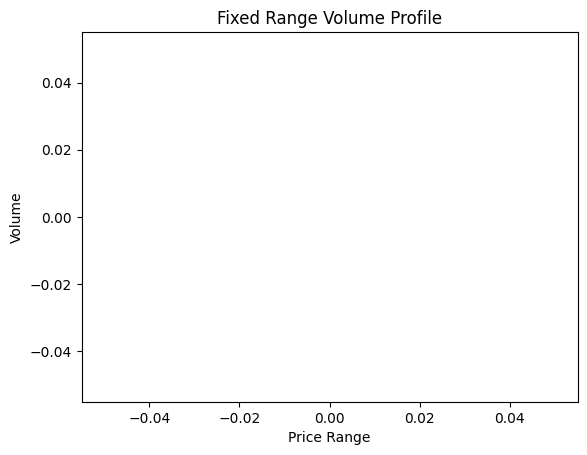

In [ ]:
import matplotlib.pyplot as plt

# Create a bar chart for the volume profile
plt.bar(np.arange(num_ranges) * price_range, volume_profile, width=price_range, align='edge')
plt.xlabel('Price Range')
plt.ylabel('Volume')
plt.title('Fixed Range Volume Profile')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats, signal
import plotly.express as px
import plotly.graph_objects as go

# Fetch OHLCV data

volume = df_XUD['volume']
close = df_XUD['close']

In [ ]:
px.histogram(df_XUD, x='volume', y='close', nbins=25, orientation='h').show()


In [ ]:
kde_factor = 0.05
num_samples = 500
kde = stats.gaussian_kde(close,weights=volume,bw_method=kde_factor)
xr = np.linspace(close.min(),close.max(),num_samples)
kdy = kde(xr)
ticks_per_sample = (xr.max() - xr.min()) / num_samples

def get_dist_plot(c, v, kx, ky):
    fig = go.Figure()
    fig.add_trace(go.Histogram(name='Vol Profile', x=c, y=v, nbinsx=150, 
                               histfunc='sum', histnorm='probability density',
                               marker_color='#B0C4DE'))
    fig.add_trace(go.Scatter(name='KDE', x=kx, y=ky, mode='lines', marker_color='#D2691E'))
    return fig

get_dist_plot(close, volume, xr, kdy).show()

In [ ]:
peaks,_ = signal.find_peaks(kdy)
pkx = xr[peaks]
pky = kdy[peaks]

pk_marker_args=dict(size=10)
fig = get_dist_plot(close, volume, xr, kdy)
fig.add_trace(go.Scatter(name="Peaks", x=pkx, y=pky, mode='markers', marker=pk_marker_args))

In [ ]:
min_prom = 1
peaks, peak_props = signal.find_peaks(kdy, prominence=min_prom)
pkx = xr[peaks]
pky = kdy[peaks]

fig = get_dist_plot(close, volume, xr, kdy)
fig.add_trace(go.Scatter(name='Peaks', x=pkx, y=pky, mode='markers', marker=pk_marker_args))

# Draw prominence lines
left_base = peak_props['left_bases']
right_base = peak_props['right_bases']
line_x = pkx
line_y0 = pky
line_y1 = pky - peak_props['prominences']

for x, y0, y1 in zip(line_x, line_y0, line_y1):
    fig.add_shape(type='line',
        xref='x', yref='y',
        x0=x, y0=y0, x1=x, y1=y1,
        line=dict(
            color='red',
            width=2,
        )
    )
fig.show()

In [ ]:
width_range=1
peaks, peak_props = signal.find_peaks(kdy, prominence=min_prom, width=width_range)

left_ips = peak_props['left_ips']
right_ips = peak_props['right_ips']
width_x0 = xr.min() + (left_ips * ticks_per_sample)
width_x1 = xr.min() + (right_ips * ticks_per_sample)
width_y = peak_props['width_heights']

fig = get_dist_plot(close, volume, xr, kdy)
fig.add_trace(go.Scatter(name='Peaks', x=pkx, y=pky, mode='markers', marker=pk_marker_args))

for x0, x1, y in zip(width_x0, width_x1, width_y):
    fig.add_shape(type='line',
        xref='x', yref='y',
        x0=x0, y0=y, x1=x1, y1=y,
        line=dict(
            color='red',
            width=2,
        )
    )
fig.show()

In [ ]:
pipsize = 0.0001
max_width_pips = 20
min_prom = kdy.max() * 0.3
width_range=(1, max_width_pips * pipsize / ticks_per_sample)
peaks, peak_props = signal.find_peaks(kdy, width=width_range, prominence=min_prom)
pkx = xr[peaks]
pky = kdy[peaks]

In [ ]:
min_prom = kdy.max() * 0.3
peaks, peak_props = signal.find_peaks(kdy, prominence=min_prom)

left_base = peak_props['left_bases']
right_base = peak_props['right_bases']
int_from = xr.min() + (left_base * ticks_per_sample)
int_to = xr.min() + (right_base * ticks_per_sample)

[kde.integrate_box_1d(x0, x1) for x0, x1 in zip(int_from, int_to)]

[0.9770430647029253]